In [ ]:
import pandas as pd

# 파일 경로
file_path = '/content/sample_data/다중회귀_복합SCFI_2017.xlsx'

# 데이터 로드
data = pd.read_excel(file_path)

# 데이터의 처음 몇 행 확인
data.head()


,YYYYMM,CH_EXP,FLEET_DEV,CNTR_TIMECHART,WTI,R_GDP_WORLD,DEFLATOR_WORLD,R_GDP_USA,CLI_USA,PMI_US,DEFLATOR_USA,G_RELI,G_DELAY,SCFI_C
0,2014-01,21790540,17312194,46.79983,94.6,1.787676e+07,109.776667,4173.316667,100.7090,53.7,102.690000,0.694882,3.948304,1174.866
1,2014-02,9977430,17385239,46.71077,100.8,1.791018e+07,110.063333,4168.433333,100.7202,57.1,102.830000,0.681136,4.267981,1069.362
2,2014-03,17115050,17367549,46.70015,100.8,1.794359e+07,110.350000,4163.550000,100.7613,55.5,102.970000,0.721154,3.897523,969.145
3,2014-04,20089670,17534040,47.20250,102.1,1.799153e+07,110.543333,4181.376667,100.8148,55.4,103.163333,0.732795,3.648607,1078.462
4,2014-05,20500550,17701139,46.95479,102.2,1.803947e+07,110.736667,4199.203333,100.8649,56.4,103.356667,0.753047,3.736327,1137.112


In [ ]:
# YYYYMM을 datetime 형태로 변환
data['YYYYMM'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m')

# 데이터를 시간 순으로 정렬
data.sort_values('YYYYMM', inplace=True)

# 마지막 6개월 데이터를 테스트 데이터로 분리
train_data = data.iloc[:-6]
test_data = data.iloc[-6:]

# 독립변수와 종속변수 분리 (YYYYMM은 제외)
X_train = train_data.drop(columns=['YYYYMM', 'SCFI_C'])
y_train = train_data['SCFI_C']
X_test = test_data.drop(columns=['YYYYMM', 'SCFI_C'])
y_test = test_data['SCFI_C']

X_train.head(), y_train.head(), X_test.head(), y_test.head()


(     CH_EXP  FLEET_DEV  CNTR_TIMECHART    WTI   R_GDP_WORLD  DEFLATOR_WORLD  \
 0  21790540   17312194        46.79983   94.6  1.787676e+07      109.776667   
 1   9977430   17385239        46.71077  100.8  1.791018e+07      110.063333   
 2  17115050   17367549        46.70015  100.8  1.794359e+07      110.350000   
 3  20089670   17534040        47.20250  102.1  1.799153e+07      110.543333   
 4  20500550   17701139        46.95479  102.2  1.803947e+07      110.736667   
 
      R_GDP_USA   CLI_USA  PMI_US  DEFLATOR_USA    G_RELI   G_DELAY  
 0  4173.316667  100.7090    53.7    102.690000  0.694882  3.948304  
 1  4168.433333  100.7202    57.1    102.830000  0.681136  4.267981  
 2  4163.550000  100.7613    55.5    102.970000  0.721154  3.897523  
 3  4181.376667  100.8148    55.4    103.163333  0.732795  3.648607  
 4  4199.203333  100.8649    56.4    103.356667  0.753047  3.736327  ,
 0    1174.866
 1    1069.362
 2     969.145
 3    1078.462
 4    1137.112
 Name: SCFI_C, dtype: 

# 도표 16-3. 규제회귀모형 개발에 대한 주요 답변

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 모델 초기화
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()

# 모델 훈련
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)

# 훈련 데이터 예측
y_train_pred_ridge = ridge.predict(X_train)
y_train_pred_lasso = lasso.predict(X_train)
y_train_pred_elastic = elastic_net.predict(X_train)

# 테스트 데이터 예측
y_test_pred_ridge = ridge.predict(X_test)
y_test_pred_lasso = lasso.predict(X_test)
y_test_pred_elastic = elastic_net.predict(X_test)

# 성능 평가 - RMSE와 R^2
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 성능 지표 계산
metrics = pd.DataFrame(index=['Ridge', 'Lasso', 'ElasticNet'],
                       columns=['Train RMSE', 'Train R^2', 'Test RMSE', 'Test R^2'])

metrics.loc['Ridge', ['Train RMSE', 'Train R^2']] = calculate_metrics(y_train, y_train_pred_ridge)
metrics.loc['Lasso', ['Train RMSE', 'Train R^2']] = calculate_metrics(y_train, y_train_pred_lasso)
metrics.loc['ElasticNet', ['Train RMSE', 'Train R^2']] = calculate_metrics(y_train, y_train_pred_elastic)

metrics.loc['Ridge', ['Test RMSE', 'Test R^2']] = calculate_metrics(y_test, y_test_pred_ridge)
metrics.loc['Lasso', ['Test RMSE', 'Test R^2']] = calculate_metrics(y_test, y_test_pred_lasso)
metrics.loc['ElasticNet', ['Test RMSE', 'Test R^2']] = calculate_metrics(y_test, y_test_pred_elastic)

metrics


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.600e+04, tolerance: 1.804e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.057e+04, tolerance: 1.804e+02
  model = cd_fast.enet_coordinate_descent(


,Train RMSE,Train R^2,Test RMSE,Test R^2
Ridge,50.537816,0.94478,78.412425,-2.837598
Lasso,50.721734,0.944378,68.775062,-1.95224
ElasticNet,56.436609,0.931138,44.801919,-0.252803


In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid_ridge = {'alpha': [0.1, 1, 10, 100, 1000]}
param_grid_lasso = {'alpha': [0.1, 1, 10, 100, 1000]}
param_grid_elastic = {'alpha': [0.1, 1, 10, 100, 1000], 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]}

# GridSearchCV 설정
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_root_mean_squared_error')
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_root_mean_squared_error')
grid_elastic = GridSearchCV(ElasticNet(), param_grid_elastic, cv=5, scoring='neg_root_mean_squared_error')

# 모델 훈련
grid_ridge.fit(X_train, y_train)
grid_lasso.fit(X_train, y_train)
grid_elastic.fit(X_train, y_train)

# 최적의 파라미터와 RMSE 출력
best_params_ridge = grid_ridge.best_params_
best_params_lasso = grid_lasso.best_params_
best_params_elastic = grid_elastic.best_params_

best_rmse_ridge = -grid_ridge.best_score_
best_rmse_lasso = -grid_lasso.best_score_
best_rmse_elastic = -grid_elastic.best_score_

best_params_ridge, best_rmse_ridge, best_params_lasso, best_rmse_lasso, best_params_elastic, best_rmse_elastic


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.853e+04, tolerance: 1.041e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.398e+04, tolerance: 1.474e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.570e+04, tolerance: 1.431e

({'alpha': 100},
 95.98538611266227,
 {'alpha': 10},
 96.73094915617254,
 {'alpha': 10, 'l1_ratio': 0.7},
 94.14754150982817)

# 도표 16-8. 파라미터 튜닝 전후의 라쏘모형 성능 비교

In [ ]:
# 최적화된 모델 생성
ridge_opt = Ridge(alpha=100)
lasso_opt = Lasso(alpha=10)
elastic_opt = ElasticNet(alpha=10, l1_ratio=0.7)

# 최적화된 모델 훈련
ridge_opt.fit(X_train, y_train)
lasso_opt.fit(X_train, y_train)
elastic_opt.fit(X_train, y_train)

# 최적화된 모델로 훈련 및 테스트 데이터 예측
y_train_pred_ridge_opt = ridge_opt.predict(X_train)
y_train_pred_lasso_opt = lasso_opt.predict(X_train)
y_train_pred_elastic_opt = elastic_opt.predict(X_train)
y_test_pred_ridge_opt = ridge_opt.predict(X_test)
y_test_pred_lasso_opt = lasso_opt.predict(X_test)
y_test_pred_elastic_opt = elastic_opt.predict(X_test)

# 성능 지표 계산
metrics_opt = pd.DataFrame(index=['Ridge_opt', 'Lasso_opt', 'ElasticNet_opt'],
                           columns=['Train RMSE', 'Train R^2', 'Test RMSE', 'Test R^2'])

metrics_opt.loc['Ridge_opt', ['Train RMSE', 'Train R^2']] = calculate_metrics(y_train, y_train_pred_ridge_opt)
metrics_opt.loc['Lasso_opt', ['Train RMSE', 'Train R^2']] = calculate_metrics(y_train, y_train_pred_lasso_opt)
metrics_opt.loc['ElasticNet_opt', ['Train RMSE', 'Train R^2']] = calculate_metrics(y_train, y_train_pred_elastic_opt)

metrics_opt.loc['Ridge_opt', ['Test RMSE', 'Test R^2']] = calculate_metrics(y_test, y_test_pred_ridge_opt)
metrics_opt.loc['Lasso_opt', ['Test RMSE', 'Test R^2']] = calculate_metrics(y_test, y_test_pred_lasso_opt)
metrics_opt.loc['ElasticNet_opt', ['Test RMSE', 'Test R^2']] = calculate_metrics(y_test, y_test_pred_elastic_opt)

metrics_opt


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.827e+04, tolerance: 1.804e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.215e+04, tolerance: 1.804e+02
  model = cd_fast.enet_coordinate_descent(


,Train RMSE,Train R^2,Test RMSE,Test R^2
Ridge_opt,61.417303,0.918447,31.974129,0.361902
Lasso_opt,57.533324,0.928435,34.066999,0.275635
ElasticNet_opt,63.048423,0.914057,34.199355,0.269996


In [ ]:
# 최적화된 라쏘 모델 생성 및 훈련
lasso_opt_fine = Lasso(alpha=4.175318936560404, max_iter=15000)
lasso_opt_fine.fit(X_train, y_train)

# 최적화된 라쏘 모델로 훈련 및 테스트 데이터 예측
y_train_pred_lasso_opt_fine = lasso_opt_fine.predict(X_train)
y_test_pred_lasso_opt_fine = lasso_opt_fine.predict(X_test)

# 성능 지표 계산
train_rmse_lasso_opt_fine = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso_opt_fine))
train_r2_lasso_opt_fine = r2_score(y_train, y_train_pred_lasso_opt_fine)
test_rmse_lasso_opt_fine = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso_opt_fine))
test_r2_lasso_opt_fine = r2_score(y_test, y_test_pred_lasso_opt_fine)

train_rmse_lasso_opt_fine, train_r2_lasso_opt_fine, test_rmse_lasso_opt_fine, test_r2_lasso_opt_fine


(53.890453631299685, 0.937211018391051, 42.4129856688006, -0.12276110480241975)

# 도표 16-9. 라쏘 모형으로부터 선택된 변수들만을 사용한 OLS의 회귀계수 분석

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 훈련 데이터에 상수항 추가
# 회귀 분석에서 절편을 포함시키기 위해 상수항을 추가한다.
X_train_sm = sm.add_constant(X_train)

# statsmodels의 Lasso 모형 생성 및 훈련: fit_regularized 메서드를 사용하여 라쏘 회귀 모형을 훈련한다.
# method='elastic_net'은 라쏘 회귀를 구현하기 위한 방법으로 L1_wt=1을 설정하면 라쏘 회귀가 된다.
lasso_sm = sm.OLS(y_train, X_train_sm).fit_regularized(method='elastic_net', alpha=4.175318936560404, L1_wt=1, refit=True)

# 라쏘 회귀에서 선택된 변수들 (계수가 0이 아닌 변수들)을 선택한다.
selected_features = X_train_sm.columns[lasso_sm.params != 0]

# 선택된 변수들만 사용하여 OLS 모형으로 적합한다.
X_train_selected = X_train_sm[selected_features]
ols_model = sm.OLS(y_train, X_train_selected).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 SCFI_C   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     44.84
Date:                Mon, 20 May 2024   Prob (F-statistic):           1.92e-14
Time:                        07:38:16   Log-Likelihood:                -207.12
No. Observations:                  39   AIC:                             438.2
Df Residuals:                      27   BIC:                             458.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1523.3815   1.28e+04      0.

In [ ]:
X_train_sm.columns[lasso_sm.params == 0]

Index(['G_RELI'], dtype='object')

In [ ]:
# 회귀 결과 요약 정보를 데이터프레임으로 변환한다.
results_df = pd.DataFrame({
    '변수명': selected_features,
    'OLS 회귀 계수': ols_model.params,
    '표준 오차': ols_model.bse,
    't 값': ols_model.tvalues,
    'p 값': ols_model.pvalues
})
results_df

,변수명,OLS 회귀 계수,표준 오차,t 값,p 값
const,const,1523.381535,12841.164553,0.118633,0.906445
CH_EXP,CH_EXP,0.000015,0.000005,3.332317,0.002507
FLEET_DEV,FLEET_DEV,-0.000547,0.000251,-2.182114,0.037977
CNTR_TIMECHART,CNTR_TIMECHART,-13.829756,4.458936,-3.101582,0.004473
WTI,WTI,-1.092789,2.273444,-0.480676,0.634619
R_GDP_WORLD,R_GDP_WORLD,-0.000136,0.000432,-0.314916,0.755246
DEFLATOR_WORLD,DEFLATOR_WORLD,-10.491774,19.163563,-0.547486,0.588543
R_GDP_USA,R_GDP_USA,1.590238,2.483010,0.640448,0.527280
CLI_USA,CLI_USA,-147.661607,217.092522,-0.680178,0.502183
PMI_US,PMI_US,35.795186,14.094156,2.539718,0.017162


# 도표 16-10. 2차 파라미터 최적화한 라쏘 모형의 예측 결과

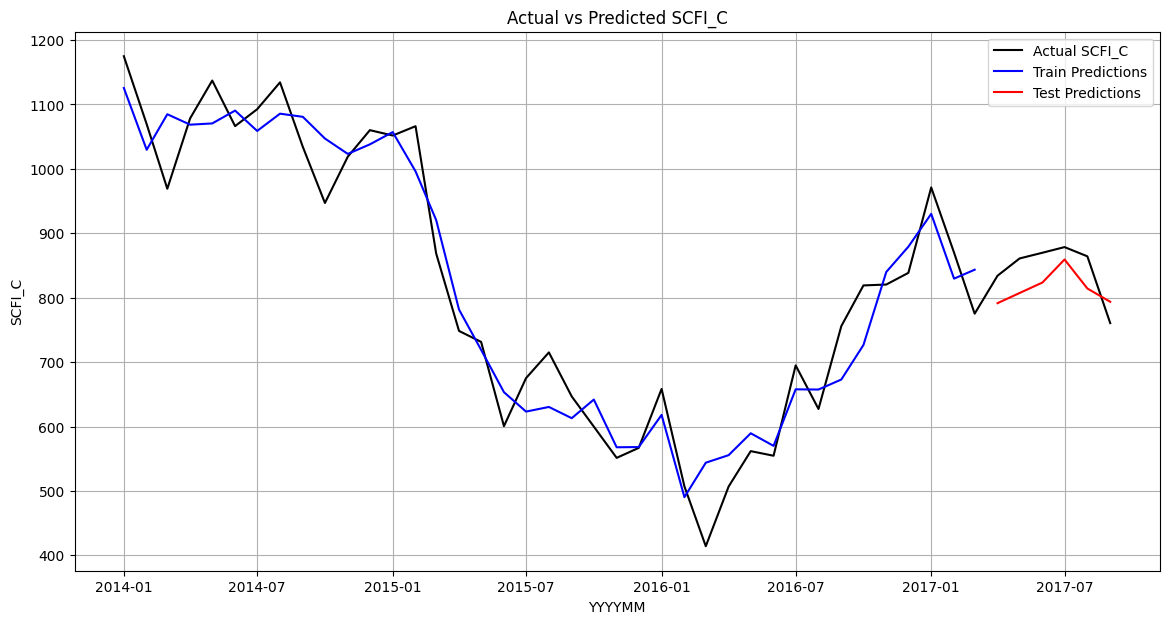

In [ ]:
import matplotlib.pyplot as plt

# 훈련 데이터와 테스트 데이터에 대한 예측
y_train_pred = lasso_opt_fine.predict(X_train)
y_test_pred = lasso_opt_fine.predict(X_test)

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(data['YYYYMM'], data['SCFI_C'], color='black', label='Actual SCFI_C')
plt.plot(train_data['YYYYMM'], y_train_pred, color='blue', label='Train Predictions')
plt.plot(test_data['YYYYMM'], y_test_pred, color='red', label='Test Predictions')

# 레이블, 타이틀 및 범례 설정
plt.xlabel('YYYYMM')
plt.ylabel('SCFI_C')
plt.title('Actual vs Predicted SCFI_C')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()


# 도표 16-12. 규제회귀의 파라미터 튜닝 파이썬 코드

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# 하이퍼파라미터 그리드 설정
param_grid_ridge = {'alpha': [0.1, 1, 10, 100, 1000]}

# GridSearchCV 객체 생성
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# 그리드 서치를 통해 최적의 하이퍼파라미터 찾기
grid_ridge.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 그에 대한 평균 RMSE
best_params_ridge = grid_ridge.best_params_
best_rmse_ridge = np.sqrt(-grid_ridge.best_score_)

# 최적의 하이퍼파라미터로 모델 재훈련
ridge_opt = Ridge(**best_params_ridge)
ridge_opt.fit(X_train, y_train)

# 훈련 데이터에 대한 RMSE 계산
y_train_pred = ridge_opt.predict(X_train)
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred))

# 테스트 데이터에 대한 RMSE 계산
y_test_pred = ridge_opt.predict(X_test)
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Best Params: {best_params_ridge}")
print(f"Best Cross-Validated RMSE: {best_rmse_ridge}")
print(f"Train RMSE with Best Params: {train_rmse_ridge}")
print(f"Test RMSE with Best Params: {test_rmse_ridge}")


Best Params: {'alpha': 100}
Best Cross-Validated RMSE: 101.531957237391
Train RMSE with Best Params: 61.417303393127604
Test RMSE with Best Params: 31.97412882247294


# 도표 16-13. 라쏘 모형의 OLS적합 후 회귀계수 분석 파이썬 코드

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 훈련 데이터에 상수항 추가
# 회귀 분석에서 절편을 포함시키기 위해 상수항을 추가한다.
X_train_sm = sm.add_constant(X_train)

# statsmodels의 Lasso 모형 생성 및 훈련: fit_regularized 메서드를 사용하여 라쏘 회귀 모형을 훈련한다.
# method='elastic_net'은 라쏘 회귀를 구현하기 위한 방법으로 L1_wt=1을 설정하면 라쏘 회귀가 된다.
lasso_sm = sm.OLS(y_train, X_train_sm).fit_regularized(method='elastic_net', alpha=4.175318936560404, L1_wt=1, refit=True)

# 라쏘 회귀에서 선택된 변수들 (계수가 0이 아닌 변수들)을 선택한다.
selected_features = X_train_sm.columns[lasso_sm.params != 0]

# 선택된 변수들만 사용하여 OLS 모형으로 적합한다.
X_train_selected = X_train_sm[selected_features]
ols_model = sm.OLS(y_train, X_train_selected).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 SCFI_C   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     44.84
Date:                Mon, 20 May 2024   Prob (F-statistic):           1.92e-14
Time:                        08:25:03   Log-Likelihood:                -207.12
No. Observations:                  39   AIC:                             438.2
Df Residuals:                      27   BIC:                             458.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1523.3815   1.28e+04      0.

In [ ]:
# 정규성 검사를 위한 왜도 계산
skewness = data.skew().sort_values(ascending=False)

# 왜도 결과를 DataFrame으로 변환하여 보기 좋게 표시
skewness_df = pd.DataFrame(skewness, columns=['Skewness'])
skewness_df

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'skew'

NameError: name 'data_filtered' is not defined

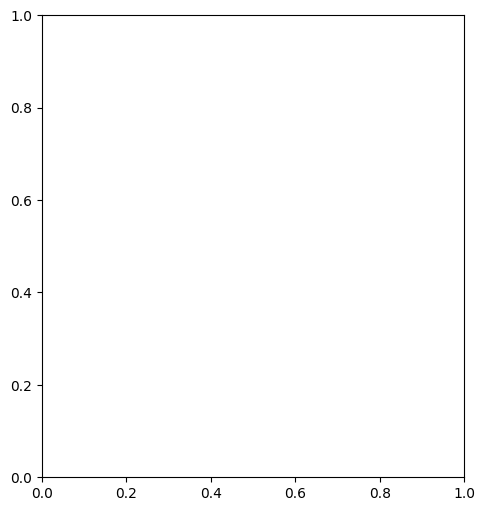

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 로그 변환 전 히스토그램 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_filtered['G_DELAY'], kde=True)
plt.title('Original G_DELAY')

plt.subplot(1, 2, 2)
sns.histplot(data_filtered['WTI'], kde=True)
plt.title('Original WTI')

plt.tight_layout()
plt.show()

# 왜도가 1 이상인 변수에 로그 변환 적용
data_filtered['log_G_DELAY'] = np.log1p(data_filtered['G_DELAY'])
data_filtered['log_WTI'] = np.log1p(data_filtered['WTI'])

# 로그 변환 후 히스토그램 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_filtered['log_G_DELAY'], kde=True)
plt.title('Log Transformed G_DELAY')

plt.subplot(1, 2, 2)
sns.histplot(data_filtered['log_WTI'], kde=True)
plt.title('Log Transformed WTI')

plt.tight_layout()
plt.show()



# 도표 16-15. 규제회귀모형 개발을 위한 데이터 전처리 파이썬 코드

In [ ]:
# 'YYYYMM' 필드를 제외한 나머지 필드들에 대한 왜도 계산
skewness = data.drop(columns=['YYYYMM']).skew().sort_values(ascending=False)

# 왜도가 1보다 큰 변수들 선택
high_skewness = skewness[skewness > 1]

# 로그 변환 적용
for col in high_skewness.index:
    data[col + '_log'] = np.log1p(data[col])

# 변환된 데이터프레임 확인
data.head()


,YYYYMM,CH_EXP,FLEET_DEV,CNTR_TIMECHART,WTI,R_GDP_WORLD,DEFLATOR_WORLD,R_GDP_USA,CLI_USA,PMI_US,DEFLATOR_USA,G_RELI,G_DELAY,SCFI_C,G_DELAY_log,WTI_log
0,2014-01-01,21790540,17312194,46.79983,94.6,1.787676e+07,109.776667,4173.316667,100.7090,53.7,102.690000,0.694882,3.948304,1174.866,1.599045,4.560173
1,2014-02-01,9977430,17385239,46.71077,100.8,1.791018e+07,110.063333,4168.433333,100.7202,57.1,102.830000,0.681136,4.267981,1069.362,1.661647,4.623010
2,2014-03-01,17115050,17367549,46.70015,100.8,1.794359e+07,110.350000,4163.550000,100.7613,55.5,102.970000,0.721154,3.897523,969.145,1.588730,4.623010
3,2014-04-01,20089670,17534040,47.20250,102.1,1.799153e+07,110.543333,4181.376667,100.8148,55.4,103.163333,0.732795,3.648607,1078.462,1.536568,4.635699
4,2014-05-01,20500550,17701139,46.95479,102.2,1.803947e+07,110.736667,4199.203333,100.8649,56.4,103.356667,0.753047,3.736327,1137.112,1.555262,4.636669
